# Import data 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%%time
X_df = pd.read_csv("drive/My Drive/HH_paramter_space_40s.csv",index_col=0)
y_df = pd.read_csv("drive/My Drive/HH_voltage_40s.csv",index_col=0)


CPU times: user 1.22 s, sys: 111 ms, total: 1.33 s
Wall time: 4.06 s


In [0]:
ag_df = pd.read_csv("drive/My Drive/PR_ag.csv",index_col=0)

In [0]:
foo_df = ag_df['first_ap_time']

In [8]:
sum(~pd.isna(foo_df))

81250

In [0]:
names = ['gbar_Na','gbar_L','E_L','Cm','gbar_K','E_Na','E_K']
X_df.columns=names
X = X_df.values
y = y_df.values
y = y[:,:1201]

In [10]:
X_df.describe()

gbar_Na       gbar_L          E_L           Cm       gbar_K  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean    119.999812     0.300000   -54.399868     1.000001    36.000011   
std      13.859568     0.034648     6.283135     0.115497     4.157874   
min      96.008101     0.240041   -65.277294     0.800180    28.801198   
25%     108.009501     0.270010   -59.840620     0.900065    32.401137   
50%     119.999996     0.300013   -54.400964     1.000036    36.000697   
75%     131.997179     0.329996   -48.959416     1.099977    39.597244   
max     143.985585     0.359957   -43.529069     1.199897    43.198358   

              E_Na          E_K  
count  2187.000000  2187.000000  
mean     50.000058   -77.000241  
std       5.774797     8.893226  
min      40.006009   -92.392450  
25%      45.002375   -84.697100  
50%      49.996375   -76.997887  
75%      54.997873   -69.304729  
max      59.991873   -61.603495

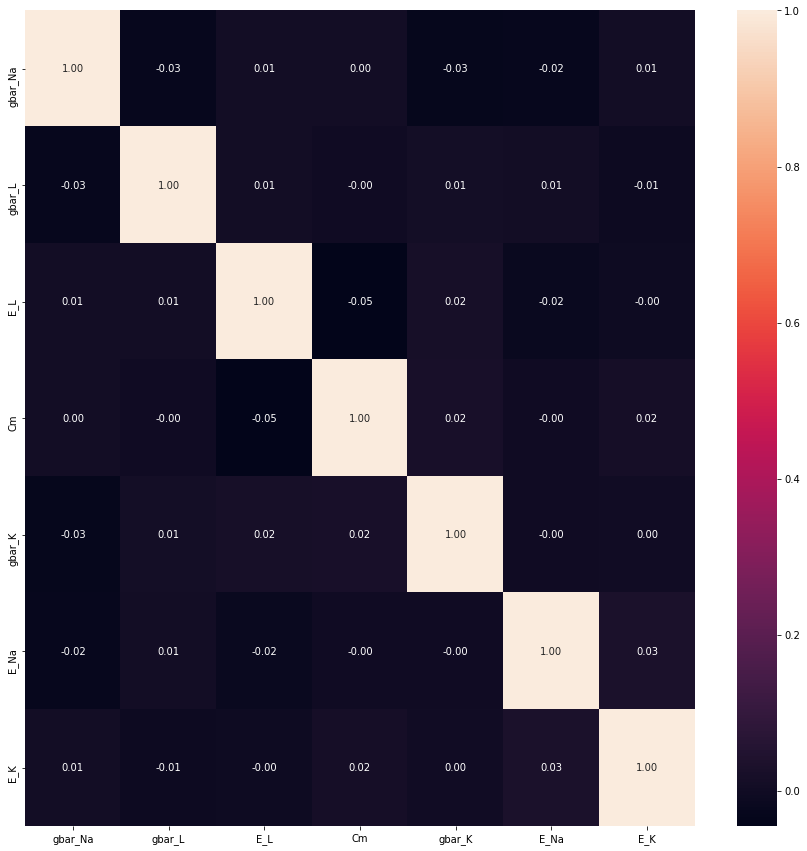

In [0]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_df.corr(), annot=True, fmt=".2f")
plt.savefig("drive/My Drive/Figures/Appendix/Correlation_HH")

In [0]:
from copy import copy
def sonames(names):
  all_names = copy(names)
  for i,name in enumerate(names):
    all_names.extend([name0+'^2' if name0=='Cm' else name+'*'+name0 for name0 in names[i:]])
  return all_names

snames = sonames(names)



# Import matlab structures

In [0]:
dir_path = "drive/My Drive/MatlabResults/HHclassical/"

In [0]:
!ls drive/My\ Drive/MatlabResults/HHclassical

global_PLSR_training.mat  local_PLSR_training.mat  PLSR_scores.mat


In [0]:
from scipy import io
global_training = io.loadmat(dir_path+'global_PLSR_training.mat')
local_training =  io.loadmat(dir_path+'local_PLSR_training.mat')
PLSR_scores =  io.loadmat(dir_path+'PLSR_scores.mat')

In [0]:
gt_struct = global_training['global_train_model']
lt_struct = local_training['local_train_model']
sc_struct = PLSR_scores['train_model_ls']



In [0]:
gt_val = gt_struct[0,0]
lt_val = lt_struct[0,0]
sc_val = sc_struct[0,0]

In [0]:
LX = sc_val['LX']
SX = sc_val['SX']
LY = sc_val['LY']
SY = sc_val['SY']
W = sc_val['W']
LXgr = sc_val['LXgr']
SXgr = sc_val['SXgr']
LYgr = sc_val['LYgr']
SYgr = sc_val['SYgr']
Wgr = sc_val['Wgr']

R2 = gt_val['R2']
B = gt_val['B']
options = gt_val['options']
tf = gt_val['tf']
MSE = gt_val['MSE']
RMSEP = gt_val['RMSEP']
pctvar = gt_val['pctvar']
Ypred = gt_val['Ypred']
optPCs = gt_val['optPCs']

cluster_centers = lt_val['cluster_centers']
Bgr = lt_val['Bgr']
options = lt_val['options']
tf = lt_val['tf']
clusters = lt_val['clusters']
optPCsgr = lt_val['optPCsgr']
pctvargr = lt_val['pctvargr']
Ypredgr = lt_val['Ypredgr']
MSEgr = lt_val['MSEgr']
RMSEPgr = lt_val['RMSEPgr']

In [0]:
tf = tf.squeeze()
indexes = tf == 1

In [0]:
X_train = X[indexes,:]
X_test = X[~indexes,:]
y_train = y[indexes,:]
y_test = y[~indexes,:]

# Plots

## Plots of membrane potential clusters

In [0]:
clusters = clusters.squeeze()

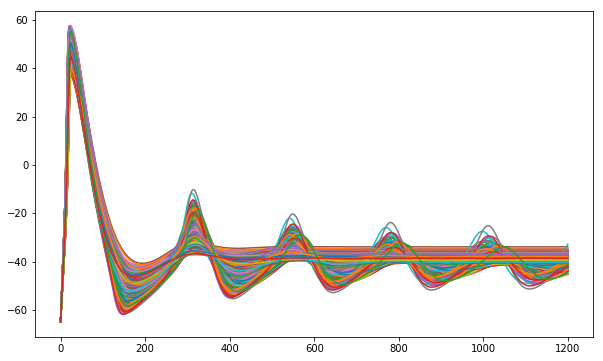

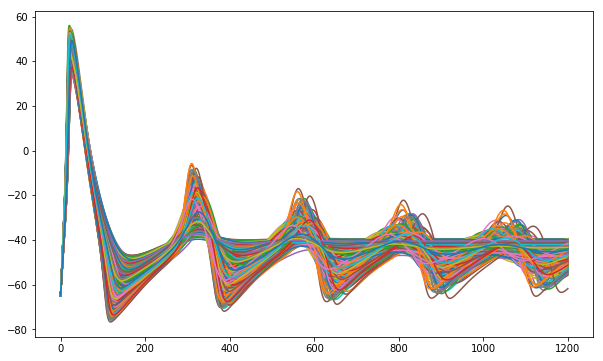

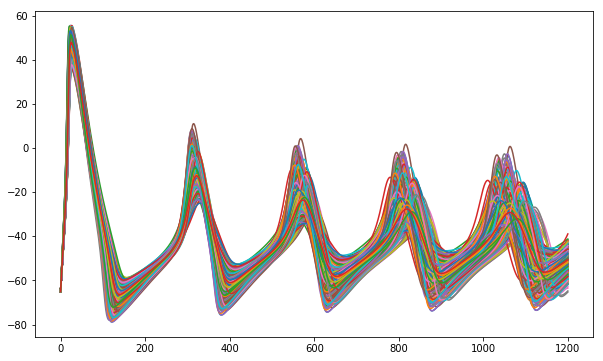

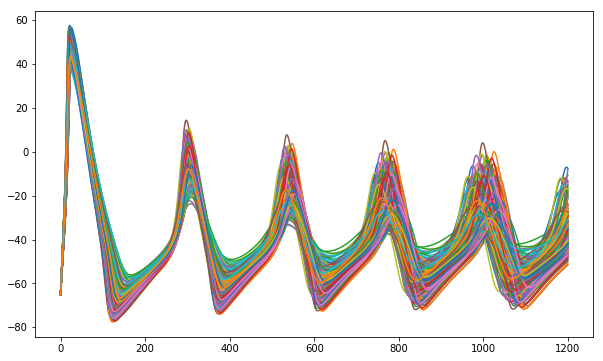

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==1,:].T);
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==2,:].T);
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==3,:].T);
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==4,:].T);

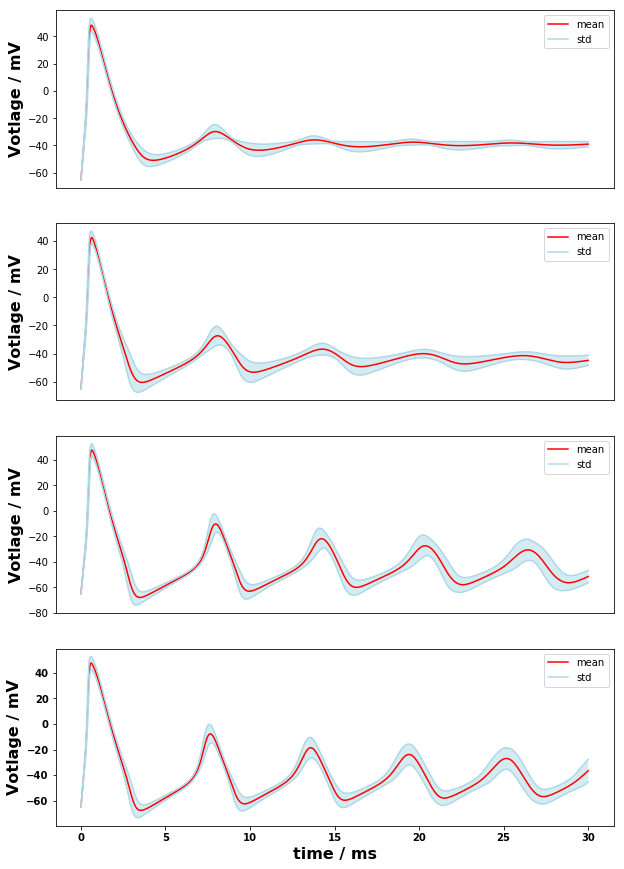

In [0]:
x_axis = np.array([i*0.025 for i in range(1201)])
plt.figure(figsize=(10,15))

for c in np.unique(clusters):
  plt.subplot(4,1,c)
  mu = np.mean(y_train[clusters==c,:],axis=0)
  std = np.std(y_train[clusters==c,:],axis=0)
  upper = mu+std
  lower = mu-std
  
  plt.plot(x_axis,mu,'r',label='mean')
  plt.plot(x_axis,upper,'lightblue',alpha=1,label='std')
  plt.plot(x_axis,lower,'lightblue',alpha=1)
  plt.fill_between(x_axis,lower,upper,facecolor='lightblue',alpha=0.5) ;

  ax = plt.gca()
  for tick in ax.xaxis.get_major_ticks():
      tick.label1.set_fontweight('bold')
  if c == 4:
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
  else:
    ax.get_xaxis().set_visible(False)
  plt.xlabel('time / ms', fontsize=16, fontweight='bold')
  plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
  plt.legend()

# Plots of all regression coefficients

In [0]:
headers = ['B0'] +  snames # Ads B0 to names

In [0]:
len(headers)

36

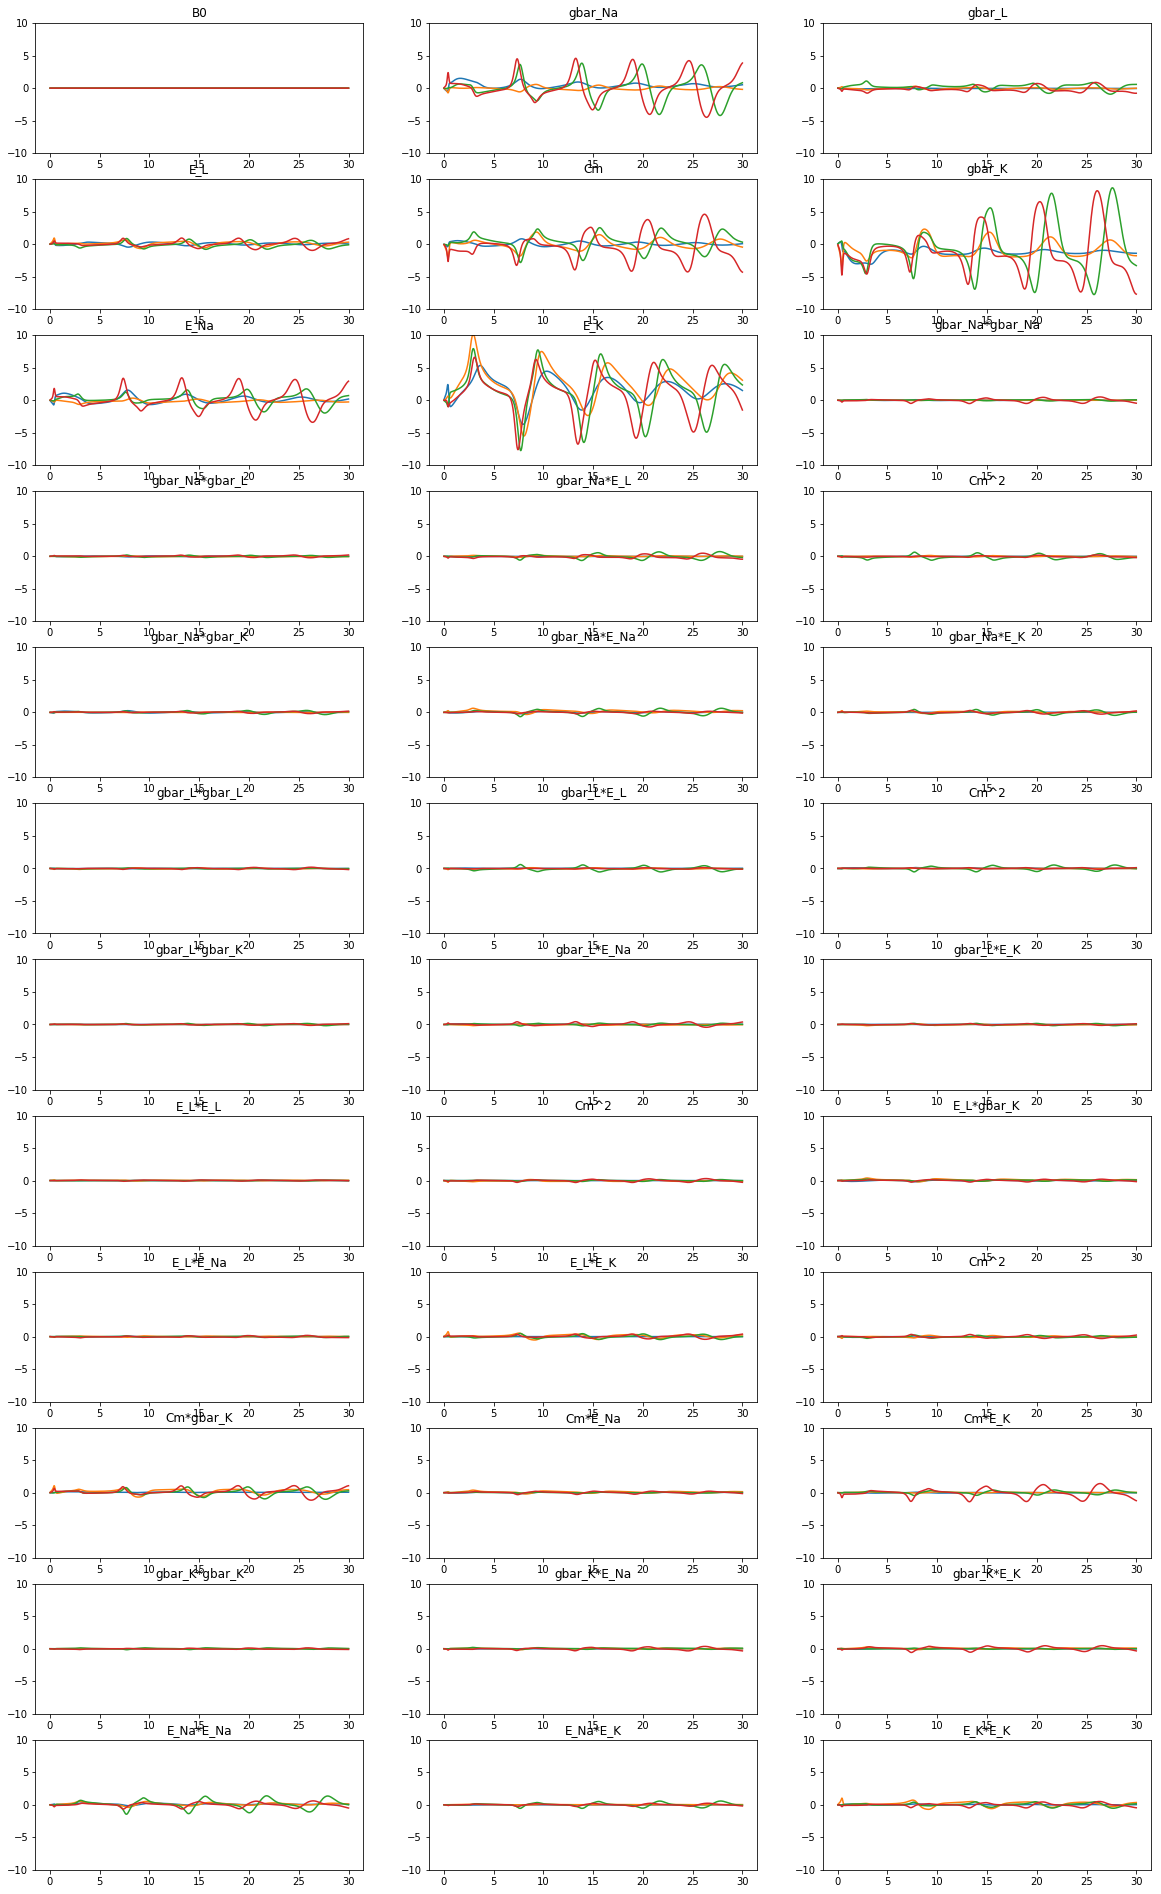

In [0]:
plt.figure(figsize=(20,100))
for i in range(len(headers)):
  plt.subplot(35,3,i+1)
  plt.title(headers[i])
  plt.plot(x_axis[1:],Bgr[:,i,:].T);
  plt.ylim(-10,10)

##  Plots of main effect regression coefficients

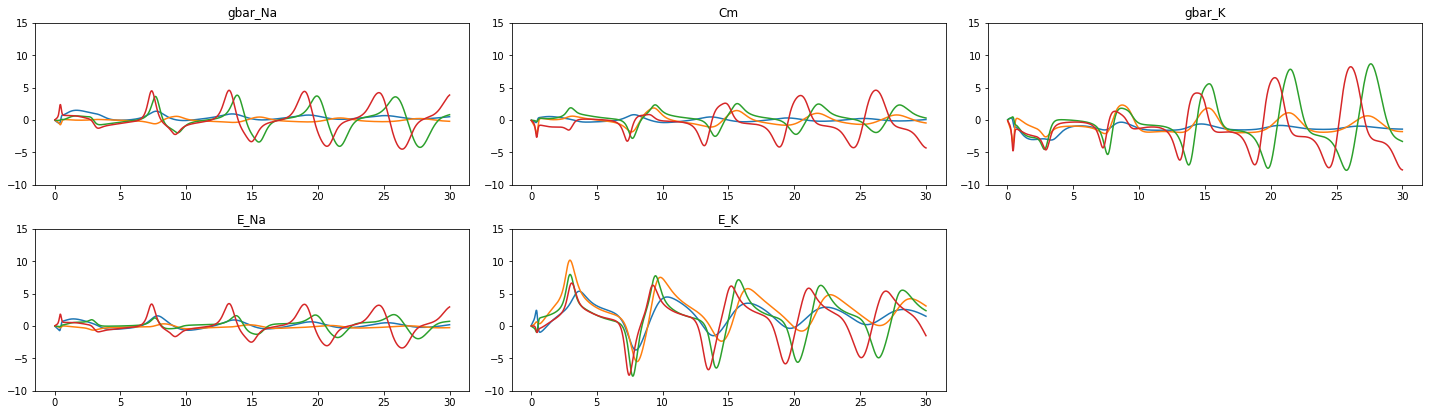

In [0]:
plt.figure(figsize=(20,100))

ctr = 0
for i in range(Bgr.shape[1]):
  
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 2):
    ctr +=1
    plt.subplot(35,3,ctr)
    plt.title(headers[i])
    plt.plot(x_axis[1:],Bgr[:,i,:].T);
    plt.ylim(-10,15)
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


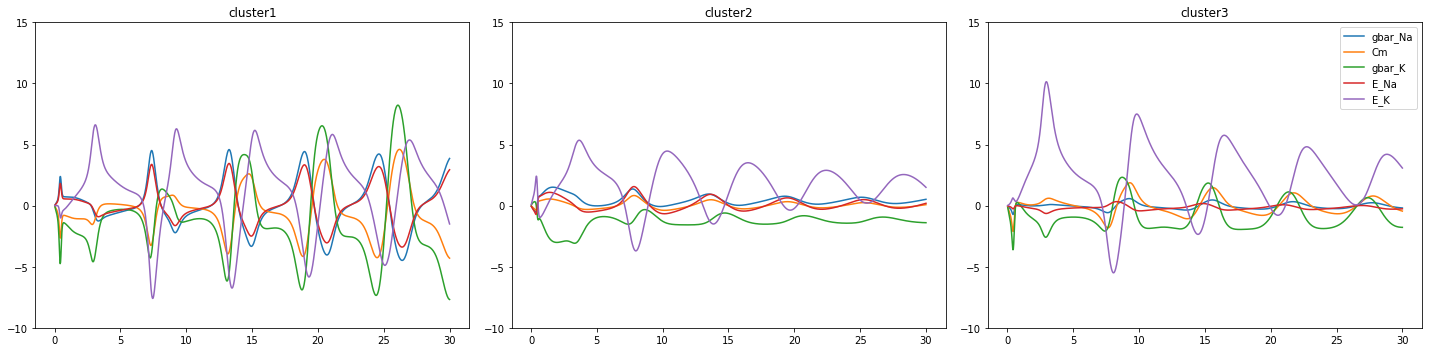

In [0]:
plt.figure(figsize=(20,5))

for i in range(14):
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 2):
    for cl in range(3):
      plt.subplot(1,3,cl+1)
      plt.title('cluster'+str(cl+1))
      plt.plot(x_axis[1:],Bgr[cl-1,i,:].T,label=headers[i]);
      plt.ylim(-10,15)
plt.legend()
plt.tight_layout()

In [0]:
mu0 = np.mean(y_train,axis=0)
std0= np.std(y_train,axis=0)
upper0 = mu0+std0
lower0 = mu0-std0

mu1 = np.mean(y_train[clusters==1,:],axis=0)
std1= np.std(y_train[clusters==1,:],axis=0)
upper1 = mu1+std1
lower1 = mu1-std1

mu2 = np.mean(y_train[clusters==2,:],axis=0)
std2= np.std(y_train[clusters==2,:],axis=0)
upper2 = mu2+std2
lower2 = mu2-std2

mu3 = np.mean(y_train[clusters==3,:],axis=0)
std3 = np.std(y_train[clusters==3,:],axis=0)
upper3 = mu3+std3
lower3 = mu3-std3

mu4 = np.mean(y_train[clusters==4,:],axis=0)
std4 = np.std(y_train[clusters==4,:],axis=0)
upper4 = mu4+std4
lower4 = mu4-std4

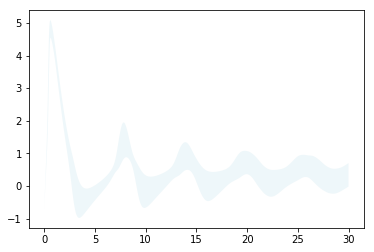

In [0]:
plt.fill_between(x_axis,lower0*0.05+50*0.05,upper0*0.05+50*0.05,facecolor='lightblue',alpha=0.2);


##  Plots of cross- and interaction effect regression coefficients

Fifteen most significant 

In [0]:
sign_indexes = []
sign_headers = []
for i in range(8,Bgr.shape[1]):
  
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 0.4):
    sign_indexes.append(i)
    sign_headers.append(headers[i])
    print(i)
    


8
10
11
13
14
16
17
19
25
27
29
32
33
34
35


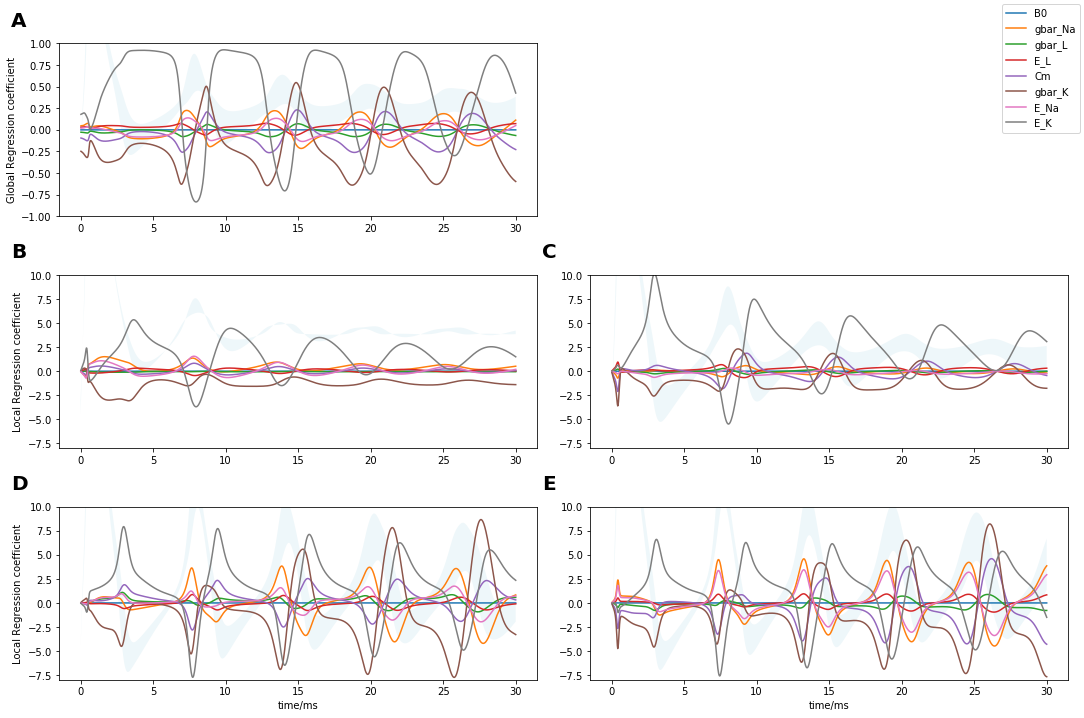

In [0]:
import string

plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.fill_between(x_axis,lower0*0.02+55*0.02,upper0*0.02+55*0.02,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:],B[i,:],label=headers[i])
plt.ylim(-1,1)
plt.ylabel('Global Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,2,3)

plt.fill_between(x_axis,lower1*0.3+55*0.3,upper1*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:],Bgr[0,i,:],label=headers[i])
plt.ylim(-8,10)
plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,4)

plt.fill_between(x_axis,lower2*0.3+50*0.3,upper2*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:],Bgr[1,i,:],label=headers[i])

plt.ylim(-8,10)

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,5)

plt.fill_between(x_axis,lower3*0.3+50*0.3,upper3*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:],Bgr[2,i,:],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')
plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,2,6)

plt.fill_between(x_axis,lower4*0.3+50*0.3,upper4*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:],Bgr[3,i,:],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')




plt.figlegend(headers[:8],loc='upper right')
plt.tight_layout()
plt.savefig("drive/My Drive/Figures/HCPLSR/HHorginal")

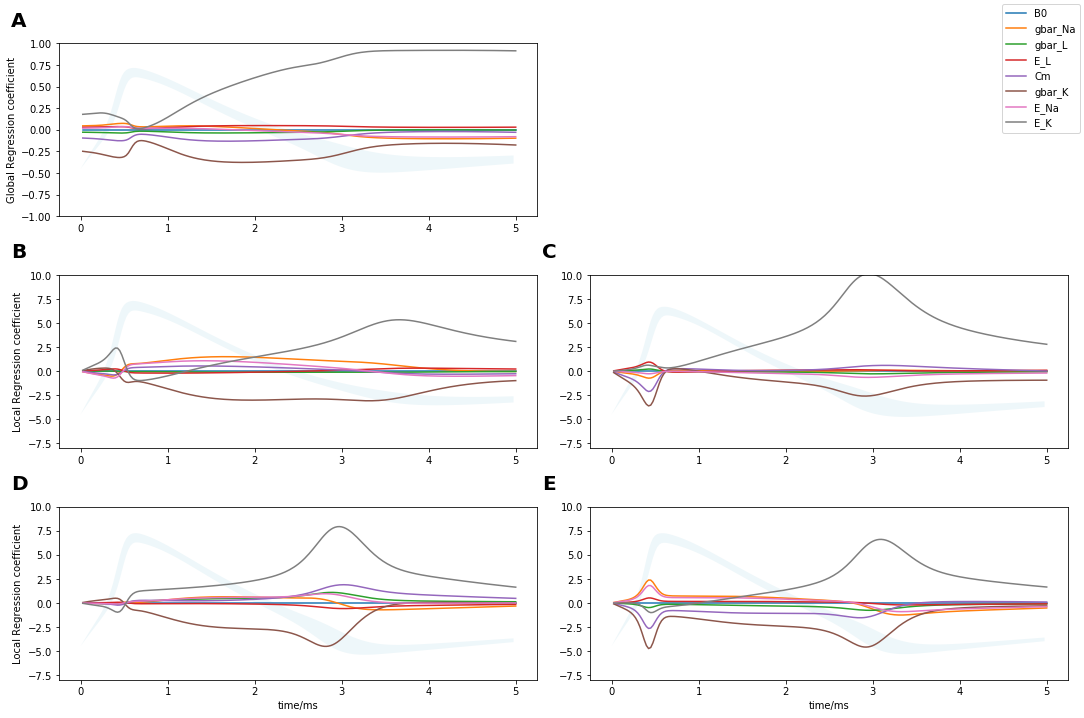

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.fill_between(x_axis[:200],lower0[:200]*0.01+20*0.01,upper0[:200]*0.01+20*0.01,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:201],B[i,:200],label=headers[i])
plt.ylim(-1,1)
plt.ylabel('Global Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,3)

plt.fill_between(x_axis[:200],lower1[:200]*0.1+20*0.1,upper1[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:201],Bgr[0,i,:200],label=headers[i])
plt.ylim(-8,10)
plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,4)

plt.fill_between(x_axis[:200],lower2[:200]*0.1+20*0.1,upper2[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:201],Bgr[1,i,:200],label=headers[i])

plt.ylim(-8,10)

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,5)

plt.fill_between(x_axis[:200],lower3[:200]*0.1+20*0.1,upper3[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:201],Bgr[2,i,:200],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')

plt.ylabel('Local Regression coefficient')


ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,6)

plt.fill_between(x_axis[:200],lower4[:200]*0.1+20*0.1,upper4[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in range(8):
  plt.plot(x_axis[1:201],Bgr[3,i,:200],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')


plt.figlegend(headers[:8],loc='upper right')
plt.tight_layout()

plt.savefig("drive/My Drive/Figures/HCPLSR/HHorginal_zoomed")

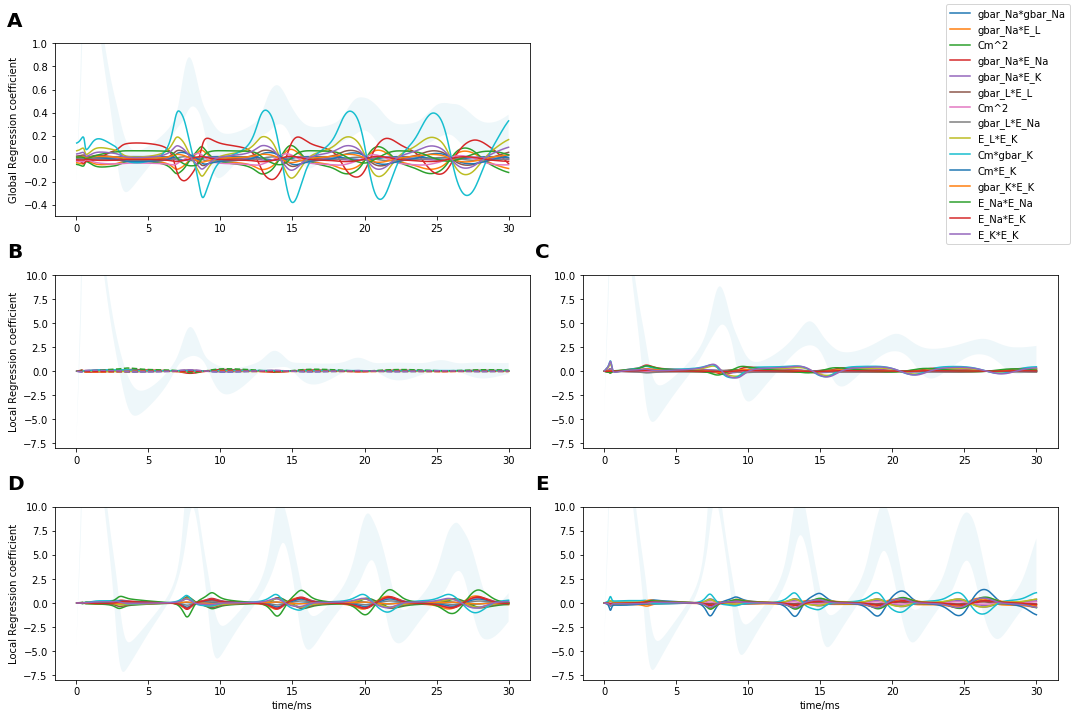

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.fill_between(x_axis,lower0*0.02+55*0.02,upper0*0.02+55*0.02,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:],B[i,:],label=headers[i])
plt.ylim(-0.5,1)
plt.ylabel('Global Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,3)

plt.fill_between(x_axis,lower1*0.3+40*0.3,upper1*0.3+40*0.3,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:],Bgr[0,i,:],label=headers[i])
plt.ylim(-8,10)

plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,4)

plt.fill_between(x_axis,lower2*0.3+50*0.3,upper2*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:],Bgr[1,i,:],label=headers[i])

plt.ylim(-8,10)

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,5)

plt.fill_between(x_axis,lower3*0.3+50*0.3,upper3*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:],Bgr[2,i,:],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')
plt.ylabel('Local Regression coefficient')


ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,2,6)

plt.fill_between(x_axis,lower4*0.3+50*0.3,upper4*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:],Bgr[3,i,:],label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')

plt.figlegend(sign_headers,loc='upper right')
plt.tight_layout()
plt.savefig("drive/My Drive/Figures/HCPLSR/HHinteractionsign1")

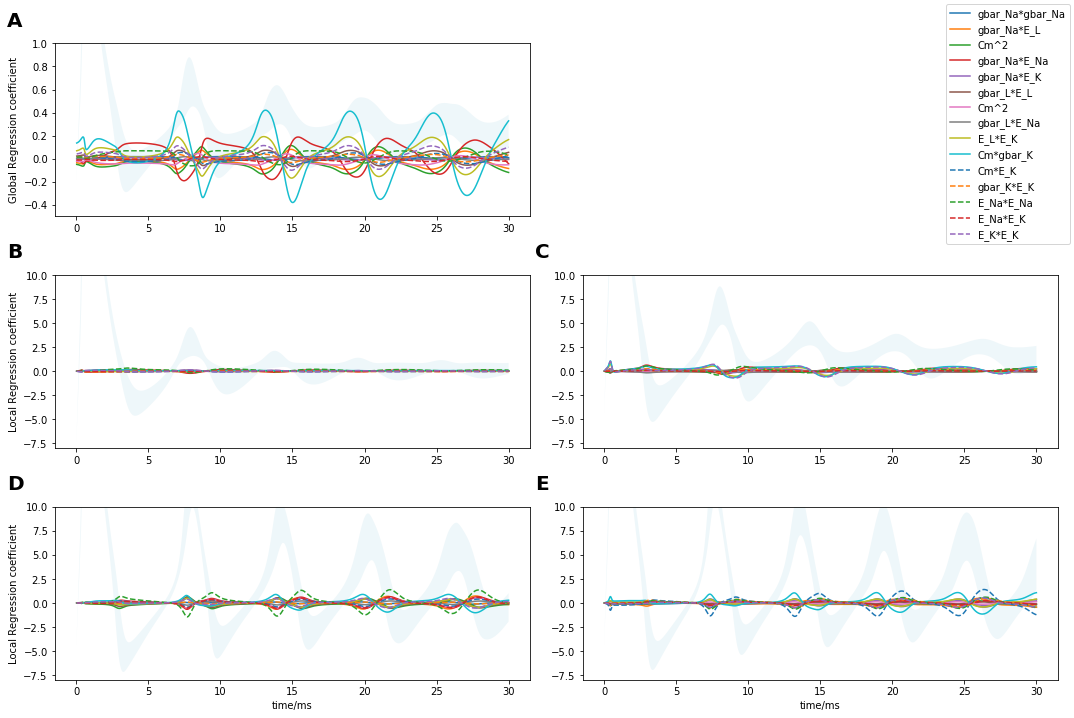

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.fill_between(x_axis,lower0*0.02+55*0.02,upper0*0.02+55*0.02,facecolor='lightblue',alpha=0.2);

for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],B[i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],B[i,:],'--',label=headers[i])  
  
  
plt.ylim(-0.5,1)
plt.ylabel('Global Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,3)

plt.fill_between(x_axis,lower1*0.3+40*0.3,upper1*0.3+40*0.3,facecolor='lightblue',alpha=0.2);
  
  
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[0,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[0,i,:],'--',label=headers[i])
  
plt.ylim(-8,10)

plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,4)

plt.fill_between(x_axis,lower2*0.3+50*0.3,upper2*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[1,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[1,i,:],'--',label=headers[i])

plt.ylim(-8,10)

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,2,5)

plt.fill_between(x_axis,lower3*0.3+50*0.3,upper3*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[2,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[2,i,:],'--',label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')
plt.ylabel('Local Regression coefficient')


ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,2,6)

plt.fill_between(x_axis,lower4*0.3+50*0.3,upper4*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[3,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[3,i,:],'--',label=headers[i])

plt.ylim(-8,10)
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')

plt.figlegend(sign_headers,loc='upper right')
plt.tight_layout()
plt.savefig("drive/My Drive/Figures/HCPLSR/HHinteractionsign15")

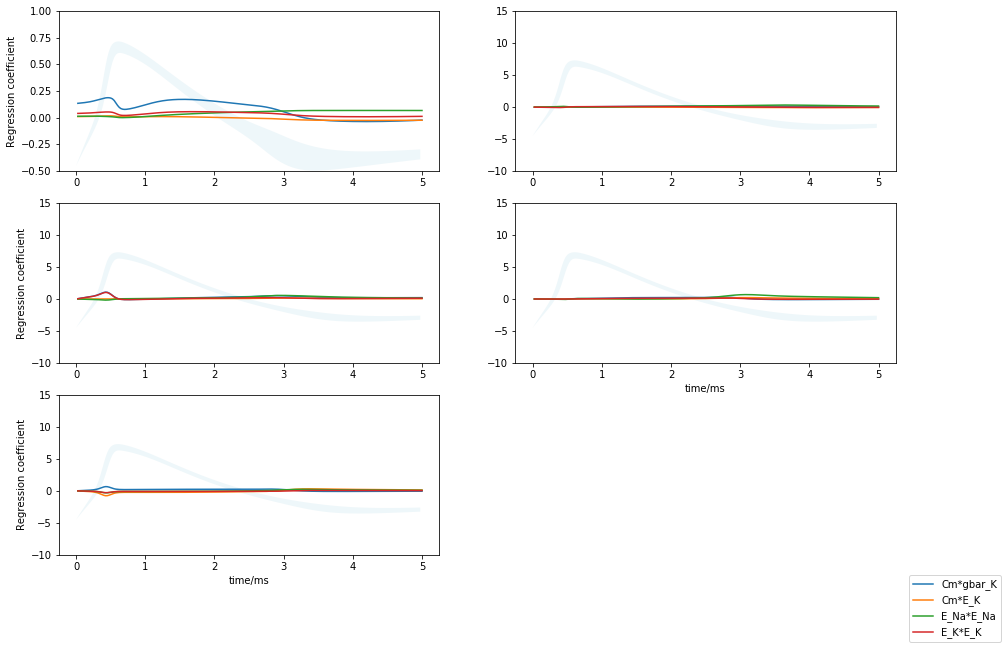

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.fill_between(x_axis[:200],lower0[:200]*0.01+20*0.01,upper0[:200]*0.01+20*0.01,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:201],B[i,:200],label=headers[i])
plt.ylim(-0.5,1)
plt.ylabel('Regression coefficient')


plt.subplot(3,2,2)

plt.fill_between(x_axis[:200],lower1[:200]*0.1+20*0.1,upper1[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:201],Bgr[0,i,:200],label=headers[i])
plt.ylim(-10,15)


plt.subplot(3,2,3)

plt.fill_between(x_axis[:200],lower1[:200]*0.1+20*0.1,upper1[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:201],Bgr[1,i,:200],label=headers[i])

plt.ylim(-10,15)
plt.ylabel('Regression coefficient')



plt.subplot(3,2,4)

plt.fill_between(x_axis[:200],lower1[:200]*0.1+20*0.1,upper1[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:201],Bgr[2,i,:200],label=headers[i])

plt.ylim(-10,15)
plt.xlabel('time/ms')

plt.subplot(3,2,5)

plt.fill_between(x_axis[:200],lower1[:200]*0.1+20*0.1,upper1[:200]*0.1+20*0.1,facecolor='lightblue',alpha=0.2);
for i in sign_indexes:
  plt.plot(x_axis[1:201],Bgr[3,i,:200],label=headers[i])

plt.ylim(-10,15)
plt.ylabel('Regression coefficient')
plt.xlabel('time/ms')

plt.figlegend(sign_headers,loc='lower right')
plt.savefig("drive/My Drive/Figures/HCPLSR/HHinteractionsign1_zoomed")

# Clustering plots from Scores

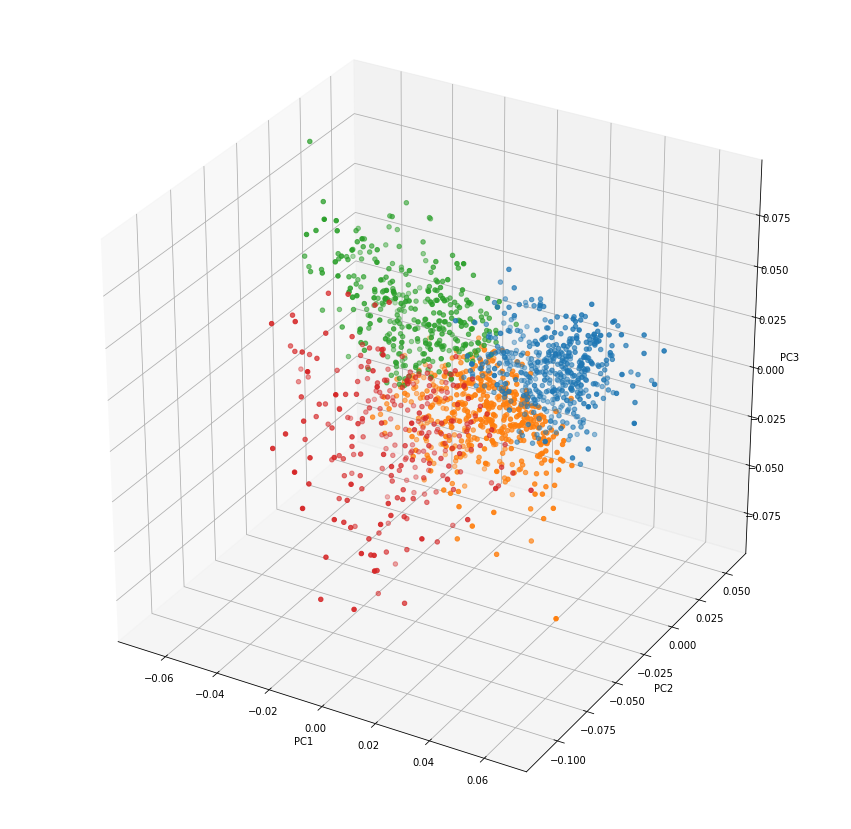

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import




fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for i in range(1,5):
  ind = clusters == i
  ax.scatter(SX[ind,0], SX[ind,1], SX[ind,2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [0]:
x_axis = np.array([i*0.025 for i in range(1201)])

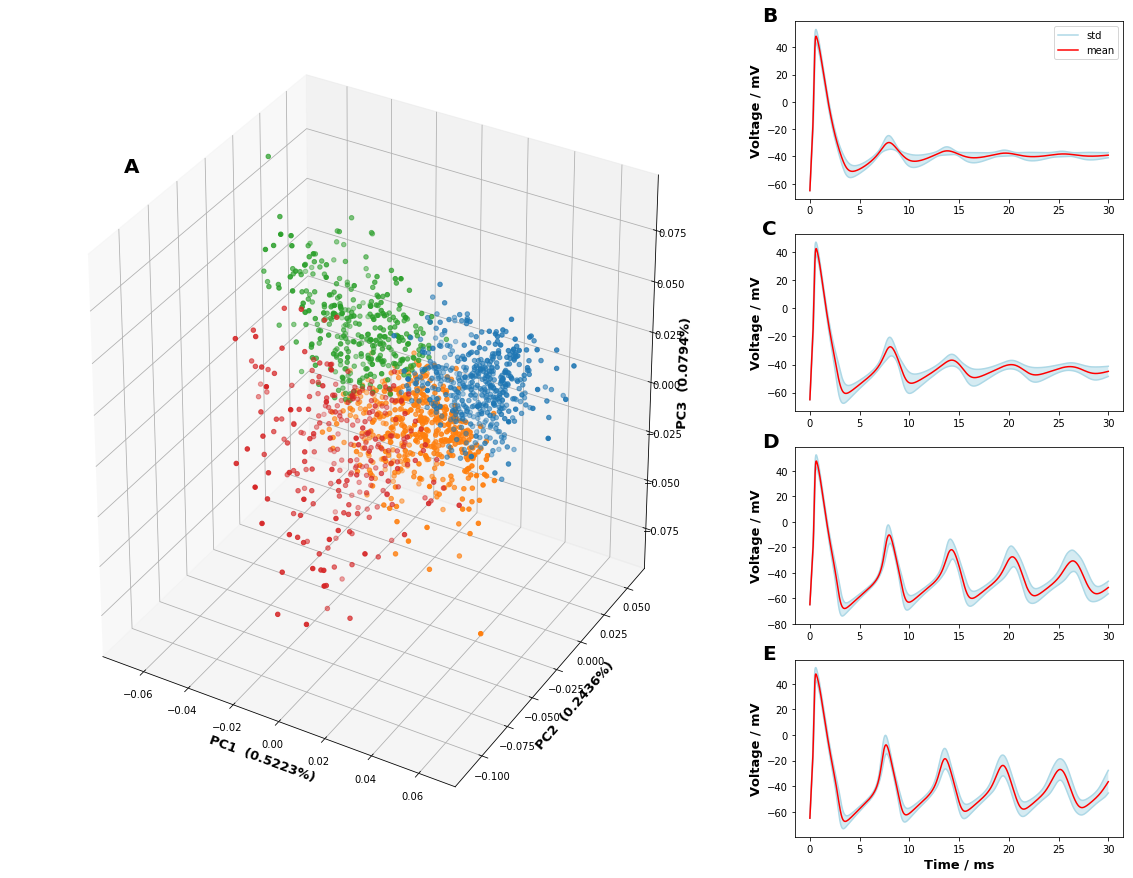

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import string

fig = plt.figure(figsize=(20,15))
plt.subplot(2,1,1,projection='3d')
ax = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan=3,projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for i in range(1,5):
  ind = clusters == i
  ax.scatter(SX[ind,0], SX[ind,1], SX[ind,2])

ax.set_xlabel('PC1' +'  ('+ str(round(pctvar[1,0],4))+'%)',weight='bold',size=13)
ax.set_ylabel('PC2' +'  ('+ str(round(pctvar[1,1],4))+'%)',weight='bold',size=13)
ax.set_zlabel('PC3' +'  ('+ str(round(pctvar[1,2],4))+'%)',weight='bold',size=13)
ax.text(-0.2, 1.1,1.4, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')




plt.subplot(4,3,3)
plt.plot(x_axis,upper1,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower1,'lightblue',alpha=1)
plt.fill_between(x_axis,lower1,upper1,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu1,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.legend()
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(4,3,6)
plt.plot(x_axis,upper2,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower2,'lightblue',alpha=1)
plt.fill_between(x_axis,lower2,upper2,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu2,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(4,3,9)
plt.plot(x_axis,upper3,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower3,'lightblue',alpha=1)
plt.fill_between(x_axis,lower3,upper3,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu3,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(4,3,12)
plt.xlabel('Time / ms',weight='bold',size=13)
plt.plot(x_axis,upper4,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower4,'lightblue',alpha=1)
plt.fill_between(x_axis,lower4,upper4,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu4,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')


plt.savefig("drive/My Drive/Figures/HCPLSR/HHclusters")

## Other plots

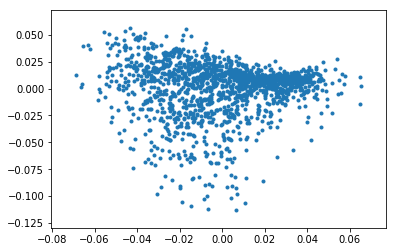

In [0]:
plt.scatter(SX[:,0],SX[:,1],marker='.')

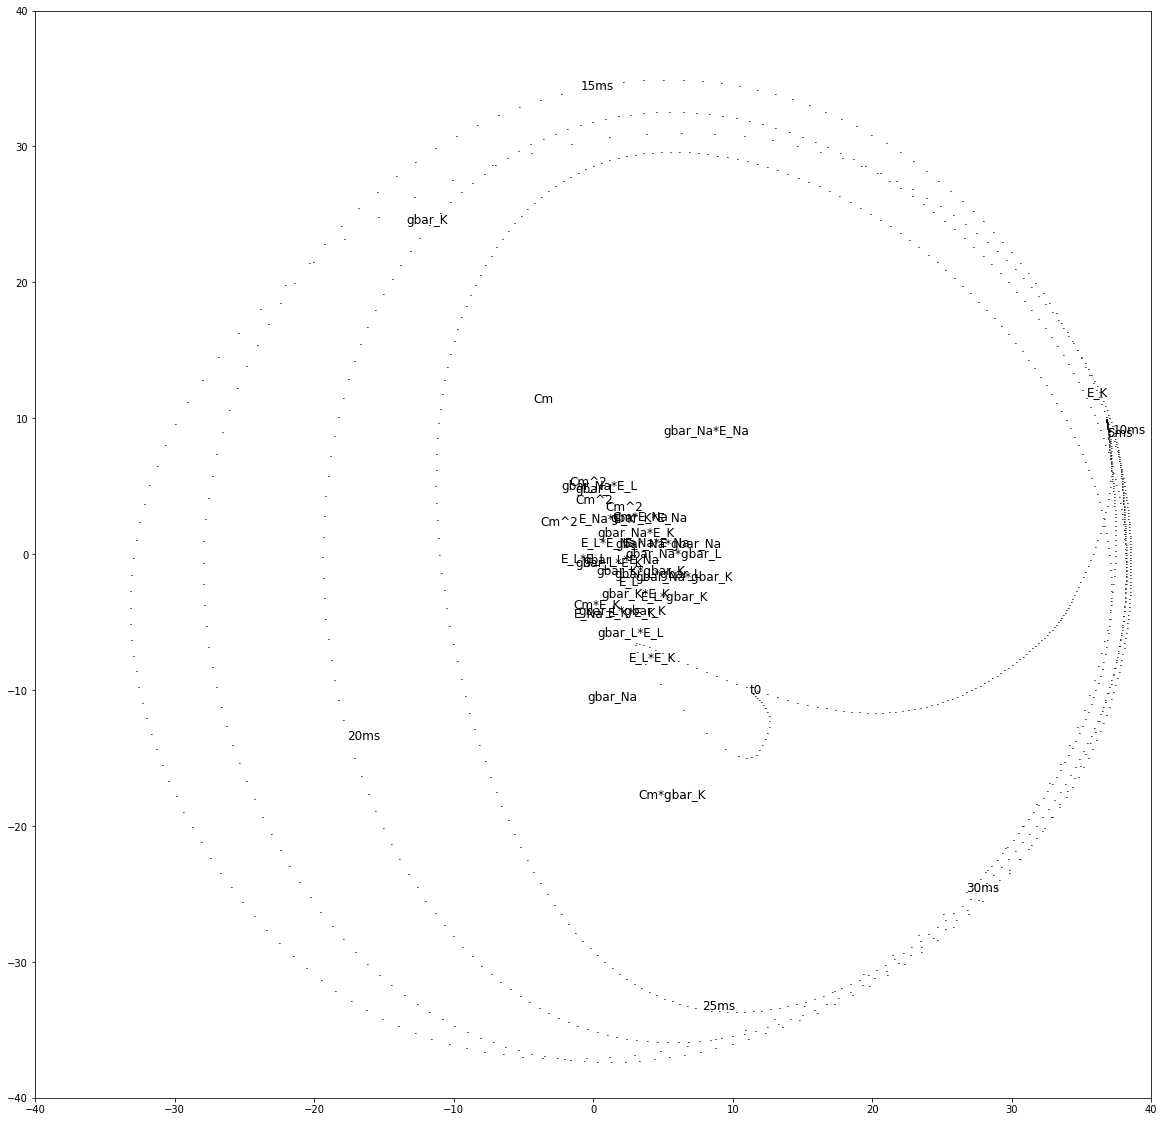

In [0]:
plt.figure(figsize=(20,20))
plt.ylim(-40,40)
plt.xlim(-40,40)
for i,n in enumerate(headers[1:]):
  plt.text(LX[i,0],LX[i,1],headers[i+1], fontsize=12)
for i,tt in enumerate(timepoints):
  plt.text(LY[i,0],LY[i,1],tt, fontsize=12)

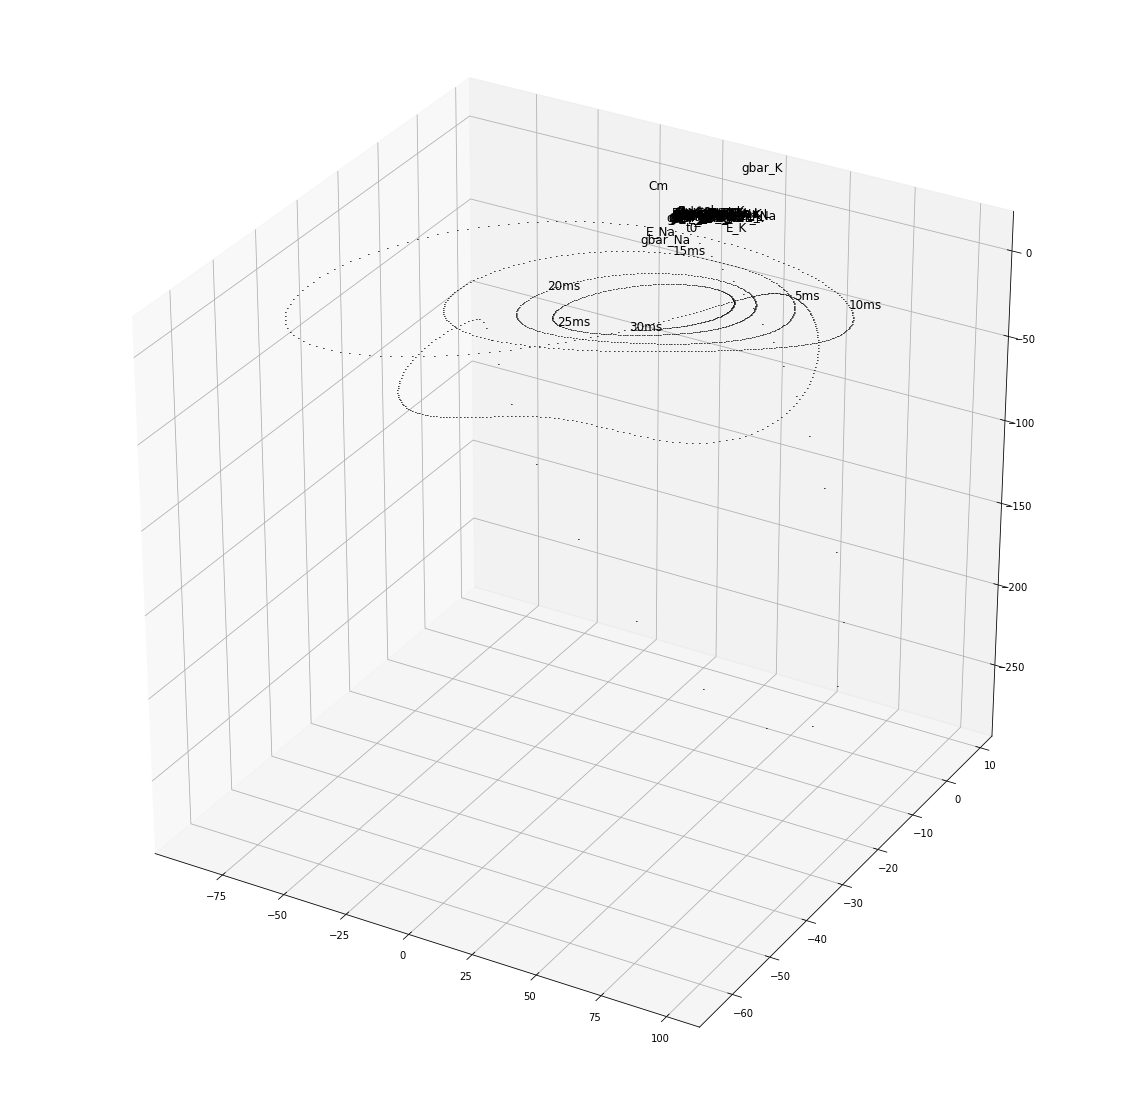

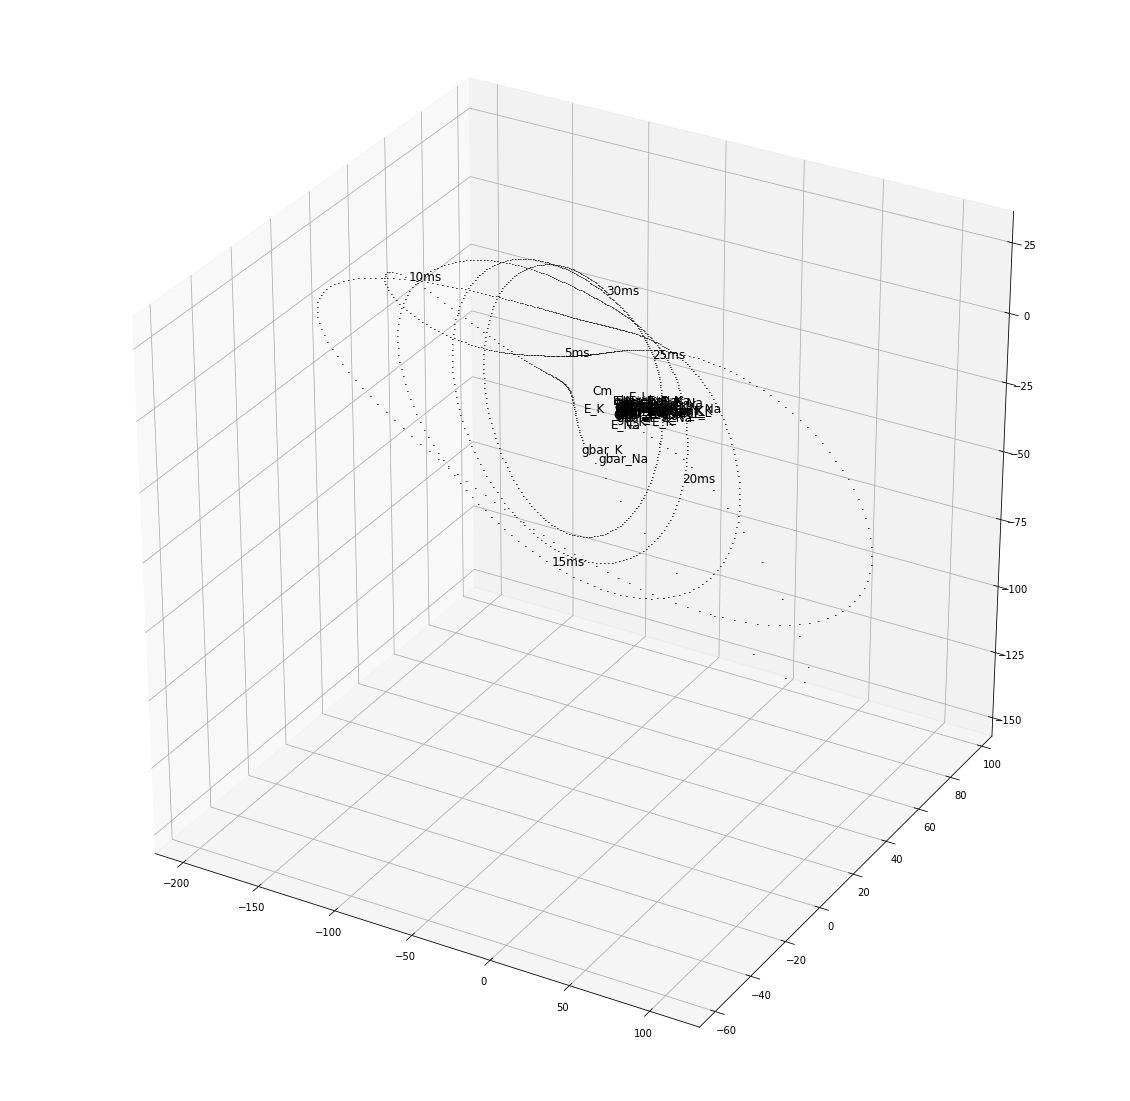

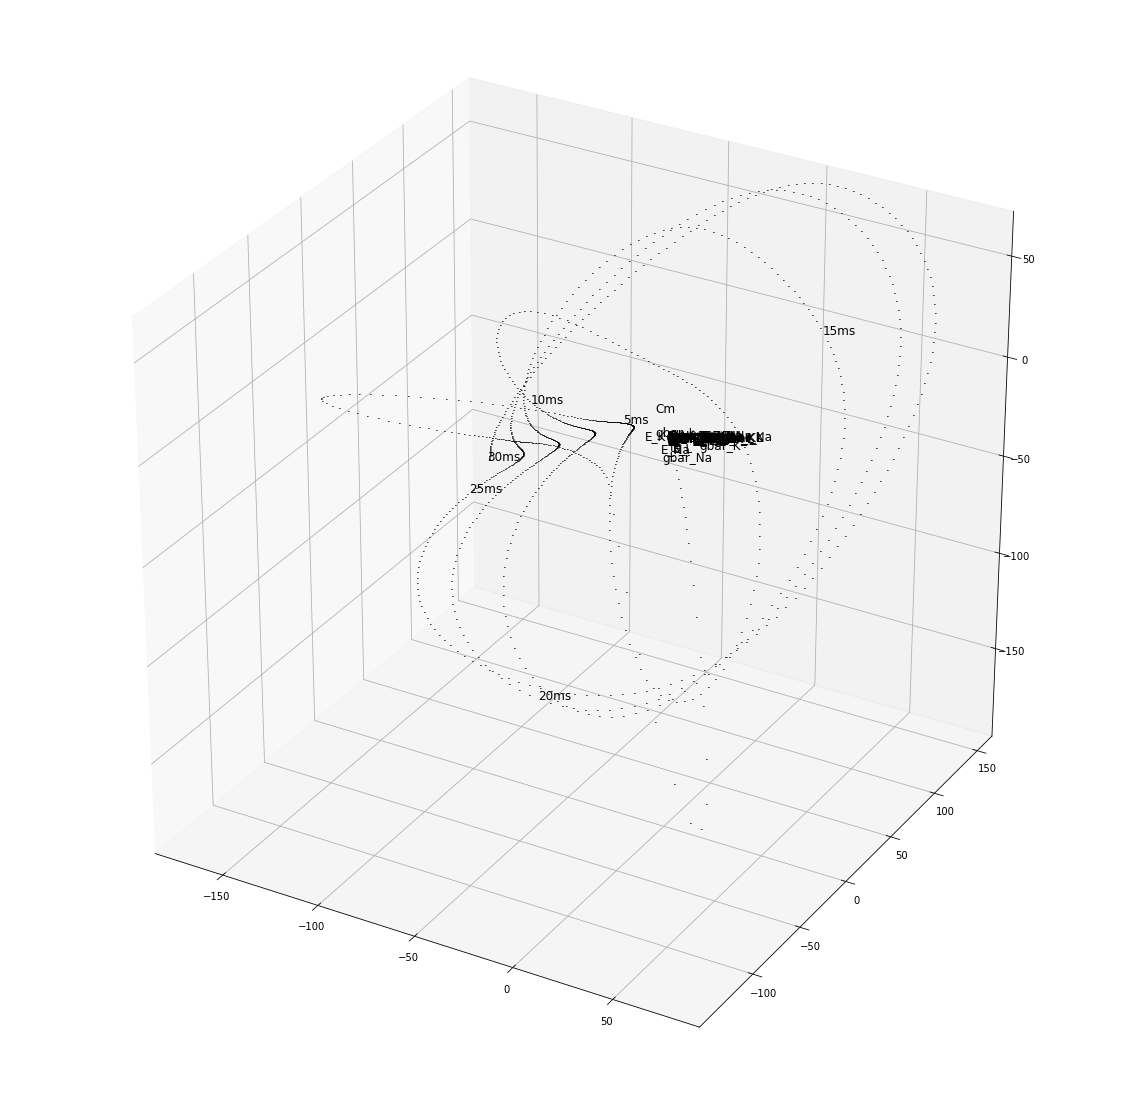

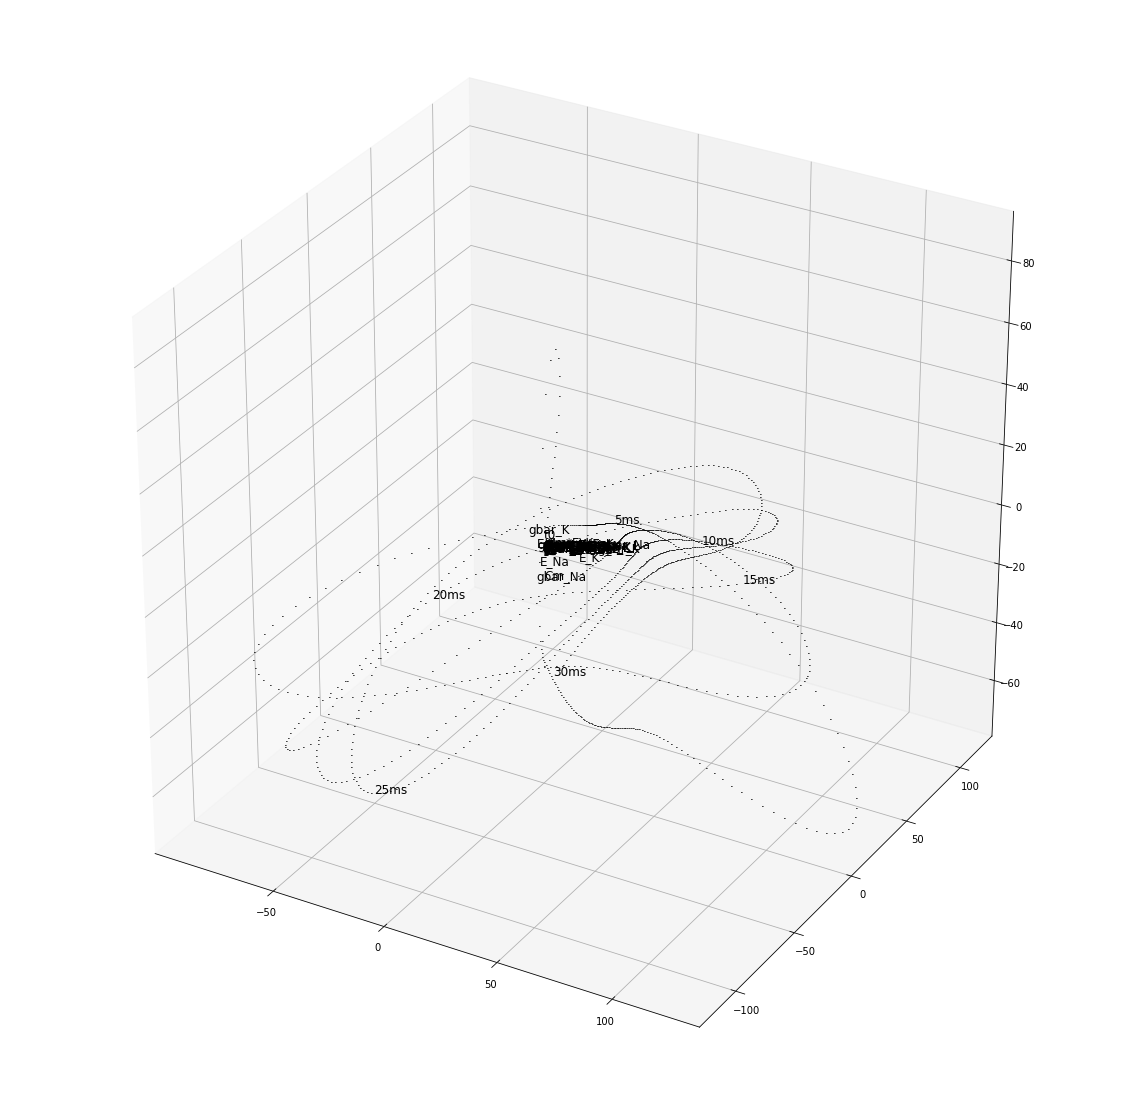

In [0]:
for c in range(4):
  fig = plt.figure(figsize=(20,20))
  ax = fig.gca(projection='3d')
  
  ax.set_xlim(np.min(LYgr[c,:,0]),np.max(LYgr[c,:,0]))
  ax.set_ylim(np.min(LYgr[c,:,1]),np.max(LYgr[c,:,1]))
  ax.set_zlim(np.min(LYgr[c,:,2]),np.max(LYgr[c,:,2]))

  for i,n in enumerate(headers[1:]):
    ax.text(LXgr[c,i,0],LXgr[c,i,1],LXgr[c,i,2],headers[i+1], fontsize=12)
  for i,tt in enumerate(timepoints):
    ax.text(LYgr[c,i,0],LYgr[c,i,1],LYgr[c,i,2],tt, fontsize=12)

In [0]:
1timepoints = ['.']*1200
timepoints[0] = 't0'
timepoints[199] = '5ms'
timepoints[399] = '10ms'
timepoints[599] = '15ms'
timepoints[799] = '20ms'
timepoints[999] = '25ms'
timepoints[1199] = '30ms'

(-14.366260089663053, 29.915929309967115)

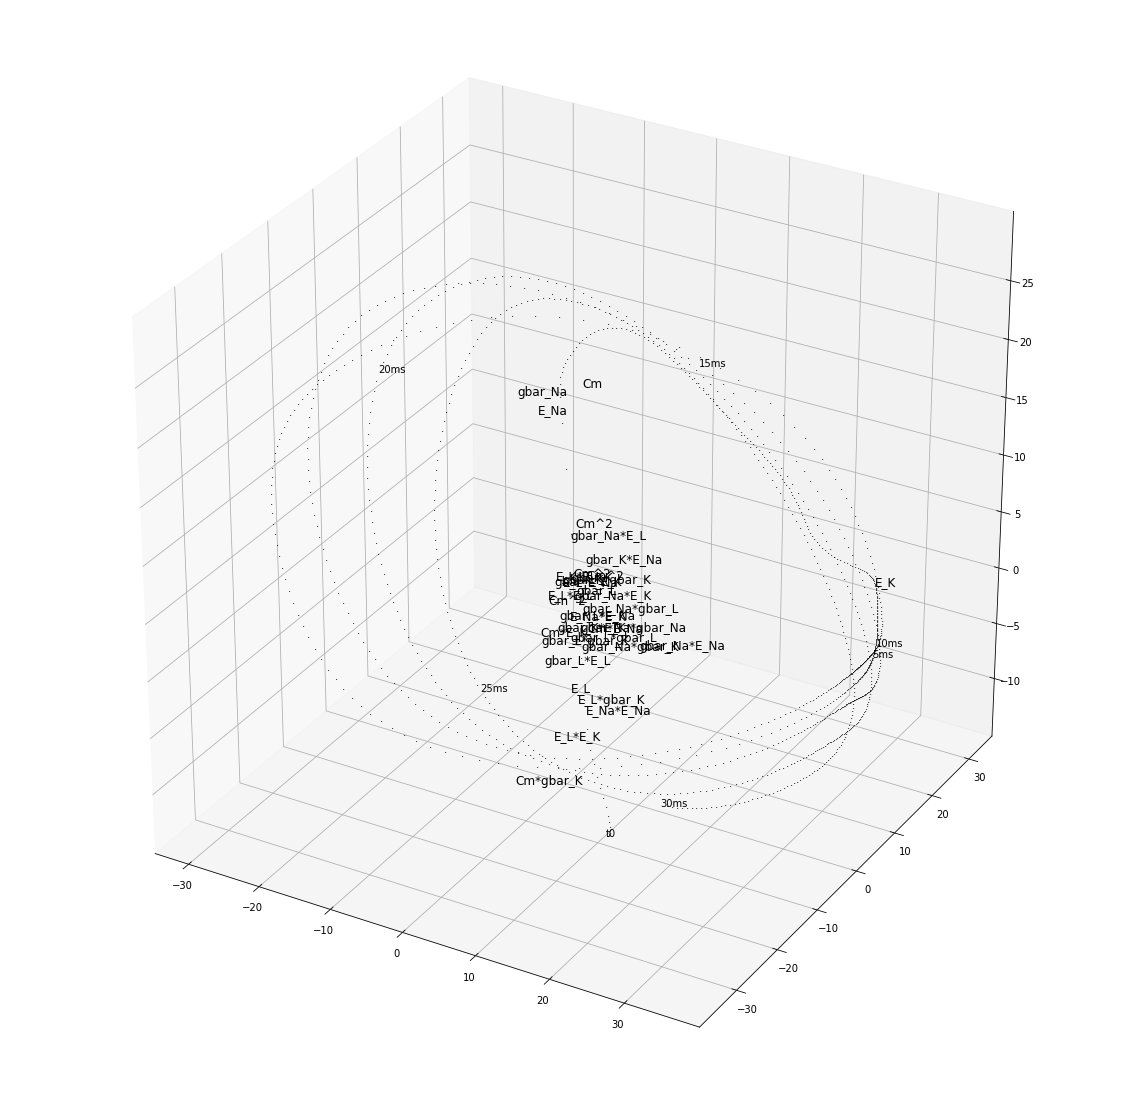

In [0]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')


for i,n in enumerate(headers[1:]):
  ax.text(LX[i,0],LX[i,1],LX[i,2],headers[i+1], fontsize=12)

for i,tt in enumerate(timepoints):
  ax.text(LY[i,0],LY[i,1],LY[i,2],tt)




ax.set_xlim(np.min(LY[:,0]),np.max(LY[:,0]))
ax.set_ylim(np.min(LY[:,1]),np.max(LY[:,1]))
ax.set_zlim(np.min(LY[:,2]),np.max(LY[:,2]))


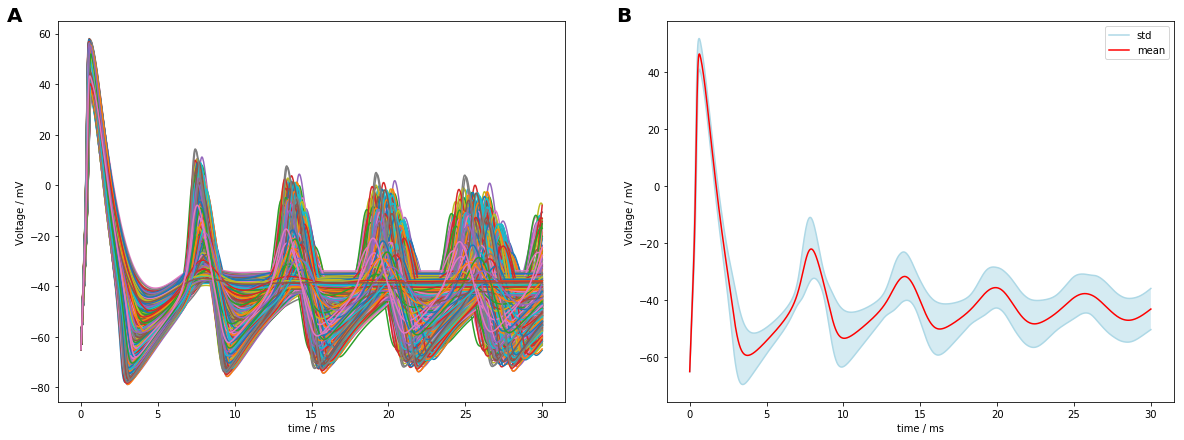

In [0]:

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(x_axis,y.T);
plt.ylabel('Voltage / mV')
plt.xlabel('time / ms')
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(1,2,2)
plt.plot(x_axis,upper0,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower0,'lightblue',alpha=1)
plt.fill_between(x_axis,lower0,upper0,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu0,'r',label='mean')
plt.ylabel('Voltage / mV')
plt.xlabel('time / ms')
plt.legend()
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')

plt.savefig("drive/My Drive/Figures/HCPLSR/HHDatagen")

# Variances

In [0]:
mean_table = pd.DataFrame()
std_table = pd.DataFrame()

for c in np.unique(clusters):
  mean_df = X_df.iloc[clusters==c].describe().T[['mean']]
  std_df = X_df.iloc[clusters==c].describe().T[['std']]
  
  mean_df.columns = [['mean cluster '+str(c)]]
  std_df.columns = [['std cluster '+str(c)]]
  mean_table = pd.concat([mean_table, mean_df],axis=1)
  std_table = pd.concat([std_table, std_df],axis=1)
  
var_table = pd.concat([mean_table,std_table],axis=1)
var_table

mean cluster 1 mean cluster 2 mean cluster 3 mean cluster 4  \
gbar_Na     120.455282     120.230847     120.193236     118.291966   
gbar_L        0.299367       0.299041       0.299107       0.301425   
E_L         -54.670876     -54.262273     -54.425277     -55.054750   
Cm            0.995918       0.995954       0.998345       1.012692   
gbar_K       35.988610      35.876128      36.060844      35.992243   
E_Na         49.667089      49.859427      49.766379      50.075533   
E_K         -77.187936     -76.963415     -76.977318     -77.476093   

        std cluster 1 std cluster 2 std cluster 3 std cluster 4  
gbar_Na     13.814834     13.624753     13.675701     14.410010  
gbar_L       0.034416      0.034619      0.035759      0.035023  
E_L          6.352038      6.333865      6.240281      6.102697  
Cm           0.115003      0.117920      0.115482      0.114311  
gbar_K       4.101624      4.253316      4.189499      4.277328  
E_Na         5.866609      5.695516      5.740315      5.862373  
E_K          8.879975      9.087755      9.058072      8.714771

In [0]:
optPCs

array([[3]], dtype=uint8)

In [0]:
pctvar[0]

array([0.0294802 , 0.03171421, 0.03029816])

In [0]:
sum(pctvar[1])

0.8453485380141972

In [0]:
sum(pctgrvar[0][0])

NameError: ignored

In [0]:
sum(pctvargr[0][0])
sum(pctvargr[0][1])

0.8655611287960234

In [0]:
sum(pctvar[0])


0.0914925698113624